In [1]:
import pandas as pd
import numpy as np


In [2]:
import importlib
import utils_jer
import utils
import pipeline
import config


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


# HSA Analysis

In [3]:
hsa_dataset = './data/hsa_data/34K.csv'
hsa_data = pd.read_csv(hsa_dataset)

In [4]:
hsa_high =dict()
hsa_low=dict()
hsa_salt=dict()
hsa_all_env = dict()
for index, row in hsa_data.iterrows():
    if '/' != row['salt']:
        hsa_salt[row['id']] = {
            'sequence':[row['sequence']],
            'labels':[row['salt']]
        }
    if '/' != row['lowph']:
        hsa_low[row['id']] = {
            'sequence':[row['sequence']],
            'labels':[row['lowph']]
        }
    if '/' != row['highph']:
        hsa_high[row['id']] = {
            'sequence':[row['sequence']],
            'labels':[row['highph']]
        }
    hsa_all_env[row['id']] = {
        'sequence':[row['sequence']],
    }

In [5]:
utils.to_fasta(hsa_high,'./data/hsa/hsa_high.fasta')
utils.to_fasta(hsa_low,'./data/hsa/hsa_low.fasta')
utils.to_fasta(hsa_salt,'./data/hsa/hsa_salt.fasta')
utils.to_fasta(hsa_all_env,'./data/hsa/hsa_all_env.fasta')

In [6]:
utils.to_pickle(hsa_high, './data/hsa/hsa_high.pickle')

In [7]:
hsa_high_arr =[]
hsa_low_arr=[]
hsa_salt_arr=[]
for index, row in hsa_data.iterrows():
    if '/' != row['salt']:
        hsa_salt_arr.append(row[['id', 'sequence', 'cdr1', 'cdr2', 'cdr3', 'salt']].rename(index={"salt":"Label"}))
    if '/' != row['lowph']:
        hsa_low_arr.append(row[['id', 'sequence', 'cdr1', 'cdr2', 'cdr3', 'lowph']].rename(index={"lowph":"Label"}))
    if '/' != row['highph']:
        hsa_high_arr.append(row[['id','sequence', 'cdr1', 'cdr2', 'cdr3','highph']].rename(index={"highph":"Label"}))
       

In [8]:
hsa_highph_xl = './data/hsa_data/HighpH.xlsx'
hsa_lowph_xl = './data/hsa_data/LowpH.xlsx'
hsa_salt_xl = './data/hsa_data/Salt.xlsx'

In [9]:
hsa_high_df = pd.DataFrame(hsa_high_arr, columns=['id', 'sequence', 'cdr1', 'cdr2', 'cdr3', 'Label'])
hsa_low_df = pd.DataFrame(hsa_low_arr, columns=['id', 'sequence', 'cdr1', 'cdr2', 'cdr3', 'Label'])
hsa_salt_df = pd.DataFrame(hsa_salt_arr, columns=['id', 'sequence', 'cdr1', 'cdr2', 'cdr3', 'Label'])

In [13]:
hsa_high_df.to_excel(hsa_highph_xl, index=False)
hsa_low_df.to_excel(hsa_lowph_xl, index=False)
hsa_salt_df.to_excel(hsa_salt_xl, index=False)

In [10]:
hsa_high_ph = pd.read_excel(hsa_highph_xl)

In [11]:
hsa_all_data_high_pickle_fn = './data/{}/all_data_ids_{}.pickle'.format('hsa', 'high')
hsa_all_data_low_pickle_fn = './data/{}/all_data_ids_{}.pickle'.format('hsa', 'low')
hsa_all_data_salt_pickle_fn = './data/{}/all_data_ids_{}.pickle'.format('hsa', 'salt')

In [12]:
hsa_all_data_high = dict()
pipeline.parse_pd_ids(hsa_all_data_high, hsa_high_ph)

max_seq_size:  135


0

In [13]:
utils.to_pickle(hsa_all_data_high, hsa_all_data_high_pickle_fn)

In [14]:
hsa_all_data_high = utils.load_pickle(hsa_all_data_high_pickle_fn)

### Run msa algorithm on the above fasta with mafft then cluster with 80% 

## Insight to MSA

In [15]:

hsa_data_aligned = './data/hsa/hsa_high_mafft.fasta'
hsa_data_aligned_short = './data/hsa/hsa_high_realigned_short.fasta'

In [16]:
utils_jer.shorten_alignement(hsa_data_aligned, hsa_data_aligned_short)

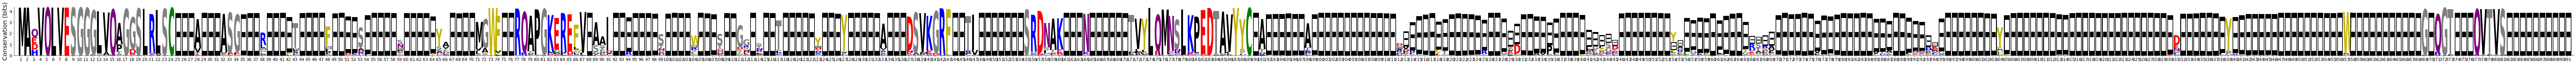

In [17]:
utils_jer.print_alignement(hsa_data_aligned)

### MSA after removing column where gap are more than 90 % of occurence

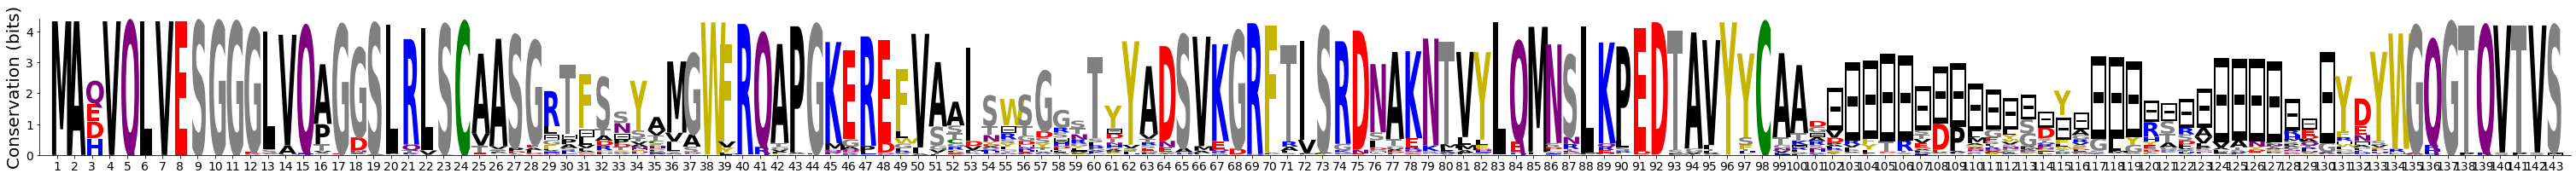

In [18]:
utils_jer.print_alignement(hsa_data_aligned_short)

In [19]:
fasta_file = './data/hsa/hsa_high.fasta'
fasta_clustered = './data/hsa/hsa_high.results'
cd_hit_path = '/mnt/local-ssd/lirane/workspace/cdhit/cd-hit'
cd_hit_cmd = '{} -i {} -o {} -c {} -d 0 -g 1 -sf 1'.format(cd_hit_path, fasta_file, fasta_clustered, 0.7)
print(cd_hit_cmd)

/mnt/local-ssd/lirane/workspace/cdhit/cd-hit -i ./data/hsa/hsa_high.fasta -o ./data/hsa/hsa_high.results -c 0.7 -d 0 -g 1 -sf 1


### Run over all cluster and split all the data to train and test sets. Within the same cluster with more than 80% identity to train the rest to test 

In [20]:
hsa_train_id, hsa_test_id = utils.cluster_res_to_dataset('./data/hsa/hsa_high.results.clstr')

In [21]:
print("# of sample in train: ", hsa_train_id.__len__())
print("# of sample in test: ", hsa_test_id.__len__())

# of sample in train:  4965
# of sample in test:  15705


In [22]:
utils.to_pickle(hsa_train_id, './data/hsa/hsa_high_train_ids.pickle')
utils.to_pickle(hsa_test_id, './data/hsa/hsa_high_test_ids.pickle')

# GST Analysis

In [23]:
gst_dataset = './data/gst_data/all_seq.csv'
gst_data = pd.read_csv(gst_dataset)

In [24]:
gst_high =dict()
gst_low=dict()
gst_salt=dict()
gst_all_env = dict()
for index, row in gst_data.iterrows():
    if '/' != row['Salt']:
        if '/' != row['BL_id']:
            gst_salt[row['BL_id']] = {
                'sequence':[row['Sequence']],
                'labels':[row['Salt']]
            }
        else:
            gst_salt[row['BM_id']] = {
                'sequence':[row['Sequence']],
                'labels':[row['Salt']]
            }
    if '/' != row['LowpH']:
        if '/' != row['BL_id']:
            gst_low[row['BL_id']] = {
                'sequence':[row['Sequence']],
                'labels':[row['LowpH']]
            }
        else:
            gst_low[row['BM_id']] = {
                'sequence':[row['Sequence']],
                'labels':[row['LowpH']]
            }
    if '/' != row['HighpH']:
        if '/' != row['BL_id']:
            gst_high[row['BL_id']] = {
                'sequence':[row['Sequence']],
                'labels':[row['HighpH']]
            }
        else:
            gst_high[row['BM_id']] = {
                'sequence':[row['Sequence']],
                'labels':[row['HighpH']]
            }
    if '/' != row['BL_id']:
        gst_all_env[row['BL_id']] = {
            'sequence':[row['Sequence']],
        }
    else:
        gst_all_env[row['BM_id']] = {
            'sequence':[row['Sequence']],
        }

In [27]:
utils.to_fasta(gst_high,'./data/gst/gst_high.fasta')
utils.to_fasta(gst_low,'./data/gst/gst_low.fasta')
utils.to_fasta(gst_salt,'./data/gst/gst_salt.fasta')
utils.to_fasta(gst_all_env,'./data/gst/gst_all_env.fasta')

In [28]:
utils.to_pickle(gst_high, './data/gst/gst_high.pickle')

In [29]:
gst_high_arr=[]
gst_low_arr=[]
gst_salt_arr=[]
for index, row in gst_data.iterrows():
    if '/' != row['Salt']:
        if '/' != row['BL_id']:
            gst_salt_arr.append(row[['BL_id', 'Sequence', 'CDR1', 'CDR2', 'CDR3', 'Salt']].rename(index={"BL_id":"id", "BM_id":"id", "Salt":"Label", "Sequence":"sequence", "CDR1":"cdr1", "CDR2":"cdr2", "CDR3":"cdr3"}))
        else:
            gst_salt_arr.append(row[['BM_id', 'Sequence', 'CDR1', 'CDR2', 'CDR3', 'Salt']].rename(index={"BL_id":"id", "BM_id":"id", "Salt":"Label", "Sequence":"sequence", "CDR1":"cdr1", "CDR2":"cdr2", "CDR3":"cdr3"}))
    if '/' != row['LowpH']:
        if '/' != row['BL_id']:
            gst_low_arr.append(row[['BL_id', 'Sequence', 'CDR1', 'CDR2', 'CDR3', 'LowpH']].rename(index={"BL_id":"id", "BM_id":"id", "LowpH":"Label", "Sequence":"sequence", "CDR1":"cdr1", "CDR2":"cdr2", "CDR3":"cdr3"}))    
        else:
            gst_low_arr.append(row[['BM_id', 'Sequence', 'CDR1', 'CDR2', 'CDR3', 'LowpH']].rename(index={"BL_id":"id", "BM_id":"id", "LowpH":"Label", "Sequence":"sequence", "CDR1":"cdr1", "CDR2":"cdr2", "CDR3":"cdr3"}))
    if '/' != row['HighpH']:
        if '/' != row['BL_id']:
            gst_high_arr.append(row[['BL_id', 'Sequence', 'CDR1', 'CDR2', 'CDR3', 'HighpH']].rename(index={"BL_id":"id", "BM_id":"id", "HighpH":"Label", "Sequence":"sequence", "CDR1":"cdr1", "CDR2":"cdr2", "CDR3":"cdr3"}))
        else:
            gst_high_arr.append(row[['BM_id', 'Sequence', 'CDR1', 'CDR2', 'CDR3', 'HighpH']].rename(index={"BL_id":"id", "BM_id":"id", "HighpH":"Label", "Sequence":"sequence", "CDR1":"cdr1", "CDR2":"cdr2", "CDR3":"cdr3"})) 

In [30]:
gst_highph_xl = './data/gst_data/HighpH.xlsx'
gst_lowph_xl = './data/gst_data/LowpH.xlsx'
gst_salt_xl = './data/gst_data/Salt.xlsx'

In [31]:
gst_high_df = pd.DataFrame(gst_high_arr, columns=['id', 'sequence', 'cdr1', 'cdr2', 'cdr3', 'Label'])
gst_low_df = pd.DataFrame(gst_low_arr, columns=['id', 'sequence', 'cdr1', 'cdr2', 'cdr3', 'Label'])
gst_salt_df = pd.DataFrame(gst_salt_arr, columns=['id', 'sequence', 'cdr1', 'cdr2', 'cdr3', 'Label'])

In [32]:
gst_high_df.to_excel(gst_highph_xl, index=False)
gst_low_df.to_excel(gst_lowph_xl, index=False)
gst_salt_df.to_excel(gst_salt_xl, index=False)


In [33]:
gst_high_ph = pd.read_excel(gst_highph_xl)

In [34]:
gst_all_data_high_pickle_fn = './data/{}/all_data_ids_{}.pickle'.format('gst', 'high')

In [35]:
gst_all_data_high = dict()
pipeline.parse_pd_ids(gst_all_data_high, gst_high_ph)

max_seq_size:  140


0

In [37]:
utils.to_pickle(gst_all_data_high, gst_all_data_high_pickle_fn)

In [38]:
gst_all_data_high = utils.load_pickle(gst_all_data_high_pickle_fn)

### Run msa algorithm on the above fasta with mafft then cluster with 80% 

## Insight to MSA

In [39]:
gst_data_aligned = './data/gst/gst_high_mafft.fasta'
gst_data_aligned_short = './data/gst/gst_high_realigned_short.fasta'

In [40]:
utils_jer.shorten_alignement(gst_data_aligned, gst_data_aligned_short)

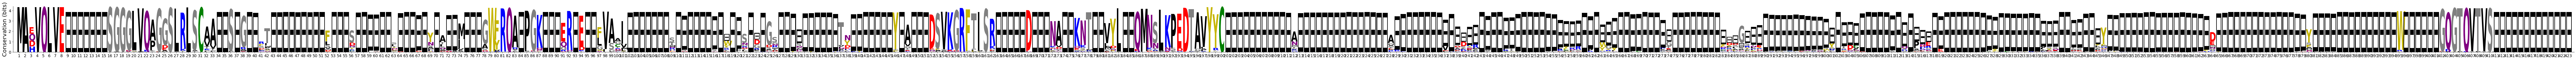

In [41]:
utils_jer.print_alignement(gst_data_aligned)

### MSA after removing column where gap are more than 90 % of occurence

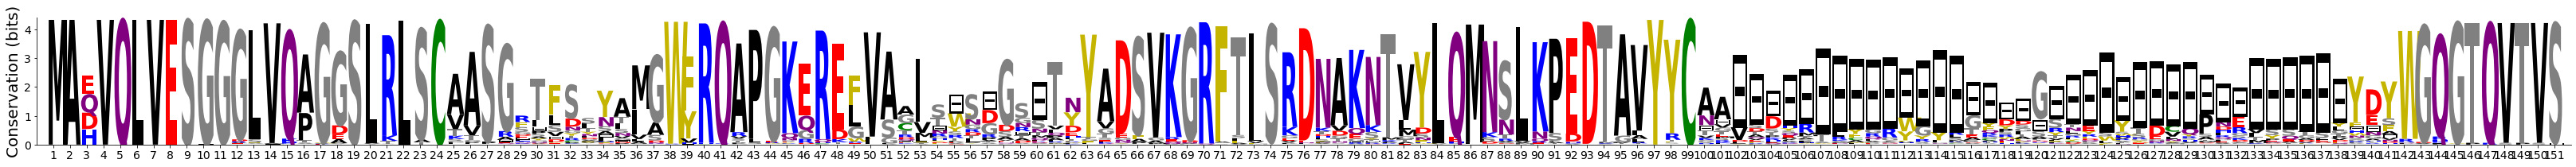

In [43]:
utils_jer.print_alignement(gst_data_aligned_short)

In [44]:
fasta_file = './data/gst/gst_high.fasta'
fasta_clustered = './data/gst/gst_high.results'
cd_hit_path = '/mnt/local-ssd/lirane/workspace/cdhit/cd-hit'
cd_hit_cmd = '{} -i {} -o {} -c {} -d 0 -g 1 -sf 1'.format(cd_hit_path, fasta_file, fasta_clustered, 0.7)
print(cd_hit_cmd)

/mnt/local-ssd/lirane/workspace/cdhit/cd-hit -i ./data/gst/gst_high.fasta -o ./data/gst/gst_high.results -c 0.7 -d 0 -g 1 -sf 1


In [45]:
gst_train_id, gst_test_id = utils.cluster_res_to_dataset('./data/gst/gst_high.results.clstr')

In [46]:
print("# of sample in train: ", gst_train_id.__len__())
print("# of sample in test: ", gst_test_id.__len__())

# of sample in train:  20034
# of sample in test:  31296


In [47]:
utils.to_pickle(gst_train_id, './data/gst/gst_high_train_ids.pickle')
utils.to_pickle(gst_test_id, './data/gst/gst_high_test_ids.pickle')